In [ ]:
from global_utils.utils import gen_dataset

music_path = "../Data/music/music_only/"
voice_path = "../Data/voice/voice_only/"

data_path = "../Data/merge_sample/"
gen_dataset(
    target_dir=data_path, music_dir=music_path, voice_dir=voice_path,
    voice_amp_ratio=0.3, train_test_split=0.2
)

In [1]:
from global_utils.utils import TrainGenerator, ValidGenerator

train_path = "../Data/merge_sample/train_data/"
valid_path = "../Data/merge_sample/test_data/"

train_bulk_num = 6
valid_bulk_num = 5
train_generator = TrainGenerator(train_path, bulk_num=train_bulk_num, sample_dur=2, sample_rate=110_000)
valid_generator = ValidGenerator(valid_path, bulk_num=valid_bulk_num, sample_dur=2, sample_rate=110_000)

print(train_generator.input_shape, valid_generator.input_shape)
print(len(train_generator._input_path), len(valid_generator._input_path))

(960, 832, 2) (960, 832, 2)
80 20


In [2]:
from global_utils.utils import gen_unet

temp_model = gen_unet(train_generator.input_shape)
temp_model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 960, 832, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 480, 416, 32  1632        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 480, 416, 32  128        ['conv2d[0][0]']                 
 alization)  

In [3]:
from keras.callbacks import EarlyStopping

temp_model.compile(optimizer="adam", loss="mae", metrics=["mae", "mse"])

patience = int(len(train_generator._input_path) / train_bulk_num * 3)
# patience = 2
callback = EarlyStopping(patience=patience, verbose=True, restore_best_weights=True)

print(patience, patience * 5)

40 200


In [4]:
model_path = "../model_save/"
name = "TB6SR11"
history = temp_model.fit(x=train_generator, epochs=patience * 5, validation_data=valid_generator)
temp_model.save(model_path + name + ".h5")

Epoch 1/200


2023-07-26 23:14:28.368856: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


184/184 [==============================] - 701s 4s/step - loss: 0.7454 - mae: 0.7470 - mse: 1.8327 - val_loss: 0.9523 - val_mae: 0.9513 - val_mse: 3.2688
Epoch 2/200
184/184 [==============================] - 561s 3s/step - loss: 0.7390 - mae: 0.7335 - mse: 1.7435 - val_loss: 1.0038 - val_mae: 0.9947 - val_mse: 3.2873
Epoch 3/200
184/184 [==============================] - 461s 3s/step - loss: 0.7875 - mae: 0.7893 - mse: 1.8915 - val_loss: 1.0096 - val_mae: 1.0094 - val_mse: 3.2322
Epoch 4/200
184/184 [==============================] - 380s 2s/step - loss: 0.7649 - mae: 0.7672 - mse: 1.8980 - val_loss: 0.9143 - val_mae: 0.9247 - val_mse: 2.4441
Epoch 5/200
184/184 [==============================] - 455s 2s/step - loss: 0.7826 - mae: 0.7732 - mse: 1.8486 - val_loss: 0.7767 - val_mae: 0.7792 - val_mse: 1.8852
Epoch 6/200
184/184 [==============================] - 369s 2s/step - loss: 0.7808 - mae: 0.7911 - mse: 1.8598 - val_loss: 0.8459 - val_mae: 0.8395 - val_mse: 2.2049
Epoch 7/200
184/

In [5]:
import pickle

with open('../model_save/trainHistoryDict_' + name, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


In [6]:
import pickle

with open('../model_save/trainHistoryDict_' + name, 'rb') as file_pi:
    train_history = pickle.load(file_pi)

train_history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [7]:
import matplotlib.pyplot as plt

epoch = [i for i in range(len(train_history["loss"]))]

loss = train_history["loss"]
val_loss = train_history["val_loss"]
mse = train_history["mse"]
val_mse = train_history["val_mse"]

print(type(loss), type(val_loss), type(mse), type(val_mse))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>


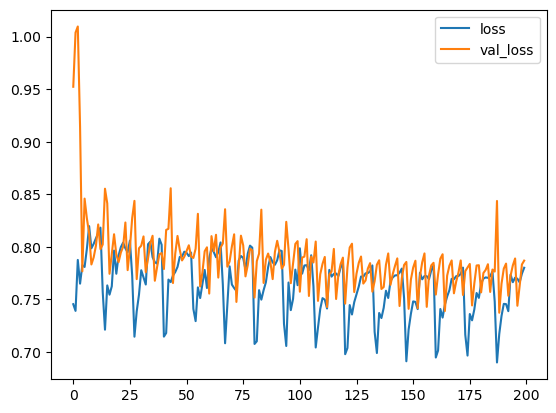

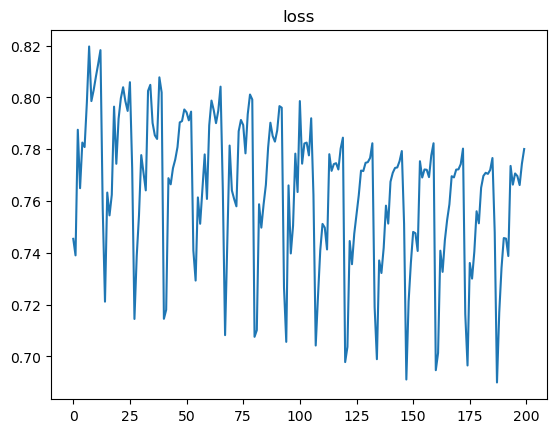

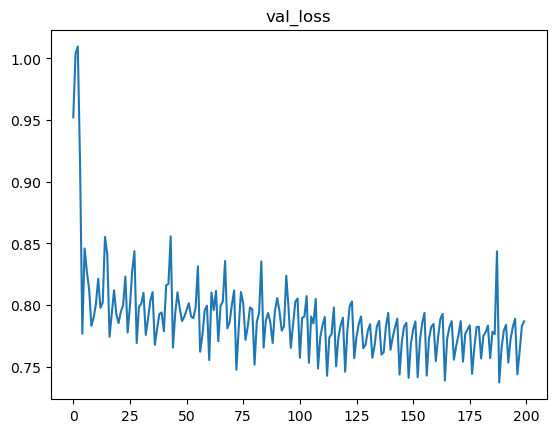

In [10]:
plt.plot(epoch, loss, label="loss")
plt.plot(epoch, val_loss, label="val_loss")
plt.legend()
plt.show()

plt.plot(epoch, loss)
plt.title("loss")
plt.show()

plt.plot(epoch, val_loss)
plt.title("val_loss")
plt.show()

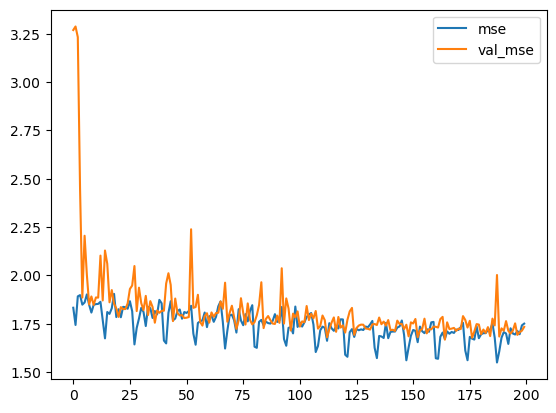

In [9]:
plt.plot(epoch, mse, label="mse")
plt.plot(epoch, val_mse, label="val_mse")
plt.legend()
plt.show()